In [ ]:
import networkx
from network import *
from node import *

Getting data for network performance

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [ ]:
data_path = "results/performance/multi-hop/result16-performance.npy"
data1 = np.load(data_path, allow_pickle=True).item()
data_path = "results/performance/multi-hop/network1-performance.npy"
data2 = np.load(data_path, allow_pickle=True).item()
data_path = "results/performance/multi-hop/result93-performance.npy"
data3 = np.load(data_path, allow_pickle=True).item()
data3.keys()
path = "results/performance/multi-hop/"

In [ ]:
def func(data1):
	p = 0
	p_list = []
	df = data1
	s_trans = [i[1] for i in df['throughput']]
	for i in s_trans:
		p_list.append(i - p)
		p = i
	s_trans = [i[2] for i in df['throughput']]
	t = []
	# data2['throughput'] = []
	for i in range(len(s_trans)):
		thr = p_list[i]/s_trans[i]
		round(thr, 2)
		t.append(thr)
		# data2['throughput'].append(thr)
		
	data1['t'] = t

func(data1)
func(data2)
func(data3)

In [ ]:
plt.plot(data1['t'],"-.", label = 'server', lw = 1)
plt.plot(data2['t'], label = 'default', lw = 1)
plt.plot(data3['t'], "-.", label = 'serverless', lw = 1)
plt.legend()
plt.show()

In [ ]:
def get_plot(prop, label):
	d = {
		"default" : list(data2[prop]),
		"serverless" : list(data1[prop]),
		"server" : list(data3[prop]),
	}

	maxl = 0
	for key in d:
		maxl = max(maxl, len(d[key]))
		if key == "throughput":
			d[key] = [round(i[1]/i[2], 2) for i in d[key]]
		
	
	lifetime = [i for i in range(1, maxl + 1)]
	plt.figure(figsize=(18, 18))
	print("key", d[key])
	# print(maxl)
	pat = ['-.', '-', '-']
	for key in d:
		d[key] += [0] * (maxl - len(d[key]))
		plt.plot(lifetime, d[key], pat.pop(), label = key, lw = 1)
	plt.xlabel("lifetime")
	plt.ylabel(label)
	plt.legend()
	
	
	#for energy: 
	# plt.xlim(200, 2100)
	# plt.ylim(0, 0.6)
	plt.plot()
	# plt.savefig(path + "throughput-t" + ".svg")
	plt.show()

In [ ]:
data_path = "results/performance/direct/res-network1-performance.npy"
data2 = np.load(data_path, allow_pickle=True).item()  #data2 default
data_path = "results/performance/direct/res-server-performance.npy"
data1 = np.load(data_path, allow_pickle=True).item() #data1 server
data_path = "results/performance/direct/res-serverless-performance.npy"
data3 = np.load(data_path, allow_pickle=True).item() #data3 serverless
data3.keys()

path = "results/performance/direct/"

In [ ]:
get_plot("t", "")

    no    acc    apl  small_worldness
0    0  0.505  3.414           0.1479
1    1  0.498  3.401           0.1464
2    2  0.503  3.408           0.1476
3    3  0.503  3.398           0.1480
4    4  0.498  3.385           0.1471
5    5  0.497  3.402           0.1461
6    6  0.498  3.415           0.1458
7    7  0.507  3.426           0.1480
8    8  0.501  3.401           0.1473
9    9  0.501  3.397           0.1475
10  10  0.507  3.379           0.1500
11  11  0.502  3.407           0.1473
12  12  0.500  3.398           0.1471
13  13  0.499  3.404           0.1466
14  14  0.500  3.403           0.1469
15  15  0.503  3.390           0.1484
16  16  0.503  3.431           0.1466
17  17  0.499  3.416           0.1461
18  18  0.495  3.415           0.1449
19  19  0.497  3.440           0.1445


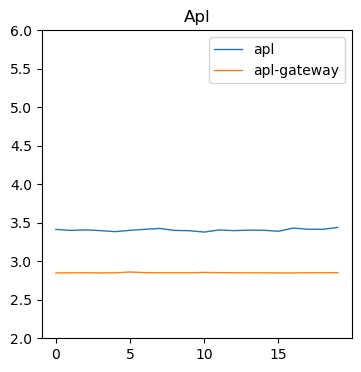

In [15]:
path = "results/result16/history.txt"
path2 = "results/result93/history.txt"
df = pd.read_csv(path)
df2 = pd.read_csv(path2) 
print(df)
plt.figure(figsize=(4,4))
plt.plot(df['no'], df['acc'], label = 'acc', lw = 1)
plt.plot(df['no'], df2['acc'], label = 'acc-gateway', lw = 1)
plt.legend()
plt.ylim(0.4, 0.6)
plt.title("ACC")
# plt.plot(df['apl'], label = 'apl')
plt.show()

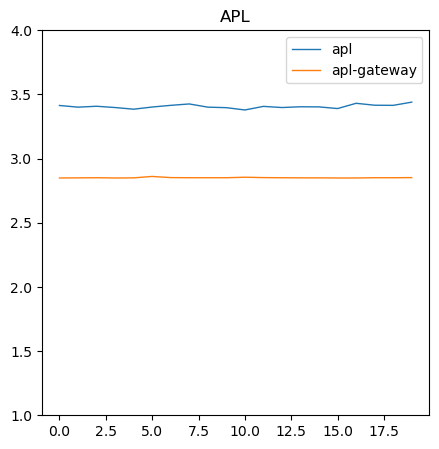

In [21]:
plt.figure(figsize=(5,5))
plt.plot(df['no'], df['apl'], label = 'apl', lw = 1)
plt.plot(df['no'], df2['apl'], label = 'apl-gateway', lw = 1)
plt.title('APL')
plt.legend()
plt.ylim(1, 4)
plt.show()

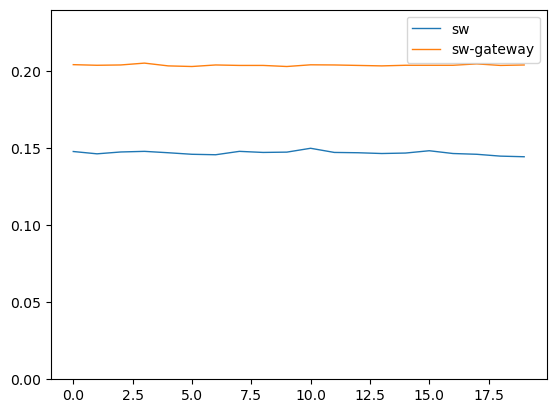

In [23]:
plt.plot(df['no'],df['small_worldness'], label = 'sw', lw = 1)
plt.plot(df['no'], df2['small_worldness'], label = 'sw-gateway', lw = 1)
plt.ylim(0, 0.24)
plt.legend()
plt.show()

In [ ]:
path = "results/result93/history3.txt"
df = pd.read_csv(path)
plt.plot(df['apl'])
plt.show()

In [ ]:
path = "results/result16/history9.txt"
df = pd.read_csv(path)
plt.plot(df['apl'])
plt.show()

In [ ]:
import networkx as nx
from network import *
path = "results/network_data/network1network_data.npy"
net = network(500, 500, 400, 0, 0)

In [ ]:
def load_network(graph_data_path, save_mode):
	"""
	save_mode: 0 -> old network data
	save_mode: 1 -> new network data
	"""
	if(save_mode == 0):
		net.initialise_nodes_fixed(1, 0)
		net.set_parameters(2000, 8, 2000, 3*1e8, 50)
		#load graph

		graph_data = np.load(graph_data_path, allow_pickle=True).item()
	else:
		_, _, graph_data = net.load_network_topology(graph_data_path)

	for Node in net.node_list:
		Node.critical_energy = 0.0

	G = net.set_nxg_from_npy(graph_data)
	# net.show_graph() 
	return G, graph_data

In [ ]:
G, graph_data = load_network(path, 1)
G.remove_node(0)
net.show_graph()

In [ ]:
from node2vec import Node2Vec

In [ ]:
node2vec = Node2Vec(G, dimensions=2, walk_length=20, num_walks=10,workers=4)
model = node2vec.fit(window=10, min_count=1)
model.wv.save_word2vec_format("embedding.emb") #save the embedding in file embedding.emb

In [ ]:
from sklearn.cluster import KMeans
import numpy as np

In [ ]:
X = np.loadtxt("embedding.emb", skiprows=1)
X=X[X[:,0].argsort()]
Z=X[0:X.shape[0],1:X.shape[1]]

In [ ]:
kmeans = KMeans(n_clusters=100, n_init= 'auto',random_state=0, algorithm="lloyd").fit(Z)
labels=kmeans.labels_  # get the cluster labels of the nodes.

In [ ]:
label_data = {
    "data": list(labels)
}
np.save("./leach-cluster-label.npy", label_data)

In [ ]:
cnt =0
for x in labels:
    if x == 0:
        cnt += 1

print(cnt)

In [ ]:
net.show_cluster("./leach-cluster-label.npy", 100)

In [ ]:
maxi = 0
for k in range(100):
	cnt = 0
	for i in range(len(labels)):
		if i == k:
			cnt += 1
	maxi = max(maxi, cnt)
	print(k, cnt)
print(maxi)

(201, 4) (285, 4)
(200, 3) (200, 3)


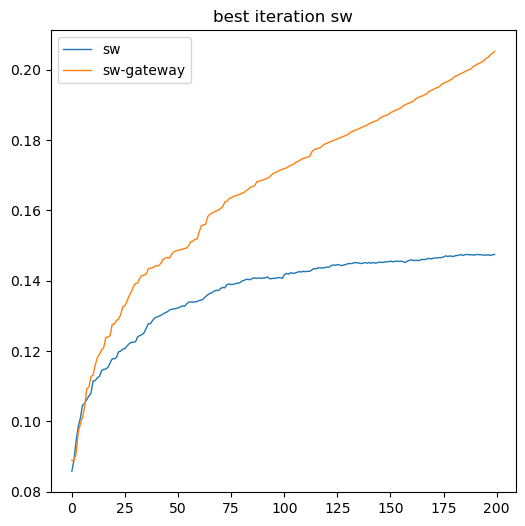

In [73]:
path = "results/result16/history9.txt"
df = pd.read_csv(path)
path = "results/result93/history3.txt"
df2 = pd.read_csv(path)
print(df.shape, df2.shape)
df = df.drop('no.', axis=1)
df2 = df2.drop('no.', axis=1)
df = df.drop(0)
df2 = df2.drop(0)
df = df.drop_duplicates(keep='last')
df2 = df2.drop_duplicates(keep='last')
df = df.reset_index()
df2 = df2.reset_index()
df = df.drop('index', axis=1)
df2 = df2.drop('index', axis=1)
print(df.shape, df2.shape)
plt.figure(figsize=(6,6))
plt.plot(df.index, df['small_worldness'], lw = 1, label = "sw")
plt.plot(df2.index, df2['small_worldness'], lw = 1, label = "sw-gateway")
plt.legend()
plt.title("best iteration sw")
plt.show()

In [78]:
df2.sample(20)

,acc,apl,small_worldness
30,0.583,4.188,0.1392
21,0.585,4.545,0.1287
14,0.587,4.879,0.1203
154,0.577,3.054,0.1889
12,0.587,4.970,0.1181
95,0.577,3.382,0.1706
129,0.577,3.181,0.1814
172,0.580,2.975,0.1950
86,0.577,3.456,0.1670
133,0.577,3.158,0.1827


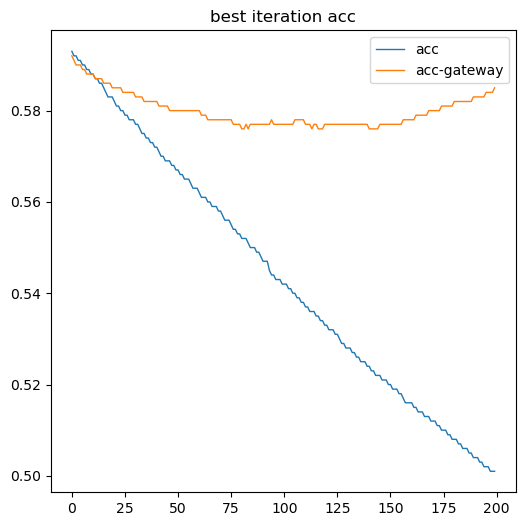

In [88]:
plt.figure(figsize=(6,6))
plt.plot(df.index, df['acc'], lw = 1, label = "acc")
plt.plot(df2.index, df2['acc'], lw = 1, label = "acc-gateway")
plt.legend()
# plt.ylim(0.49, 0.7)
plt.title("best iteration acc")
plt.show()

In [7]:
import numpy as np
data = './results/performance/leach/cluster-leach.npy-performance.npy'
dt = np.load(data, allow_pickle=True).item() 

166560

In [11]:


# best, worst
lt = [-1e9, 1e9]
en = [-1e9, 1e9]
lat = [-1e9, 1e9]
tr = [-1e9, 1e9]

In [12]:
path = "results/network_data/network1network_data.npy"
# path = "results/result16/9-graph_data.npy"
# path = "results/result93/3-graph_data.npy"

In [17]:
from network import network
from node import node
import numpy as np
import random

# paths
path = "results/network_data/network1network_data.npy"
save_path = "./results/performance/res-leach/net1/P-0.03/"

net = network(500, 500, 400, 0, 0)
gd = net.load_network(path)
net.packet_length = 8
for x in net.node_list:
	x.critical_energy = 0
	
	
sink = net.sink

net.calculate_latency()
dm = net.calculate_dist()
lm = net.latency_matrix
k = net.packet_length
er = sink.energy_for_reception(k)
dead_node = set()
rnds = 0

n = net.number_of_nodes
energy_per_round = []
latency_per_round = []
throughput_per_round = []

failed_itr_per_node = {}
ch_msg = {}
ch = {}

#	setting distance from server in every node:
for Node in net.node_list:
	Node.dist(sink)
	Node.setup_for_leach()
	failed_itr_per_node[Node] = 0
	ch_msg[Node] = 0

#	LEACH specific parameters
P = 0.03
failed_iterations = 0
clusters = []
cluster_count = 0

for Node in net.node_list:
	Node.role = 0
	Tn = P/(1 - P*(rnds % int(1/P)))
	response = random.uniform(0,1)
	if response < Tn:
		Node.role = 1
		Node.clusterID = cluster_count
		ch[cluster_count] = Node
		clusters.append([Node])
		cluster_count += 1

for Node in net.node_list:
	if Node.role == 0:
		Node.dist_to_head = 1e9
		for iiii in range(cluster_count):
			head = ch[iiii]
			d = Node.dist(head)
			if Node.dist_to_head != min(Node.dist_to_head, d):
				Node.dist_to_head = d
				Node.clusterID = iiii
				clusters[Node.clusterID].append(Node)
				
while len(dead_node) < 0.9*n:
	message_gen = n - len(dead_node)
	l = 0
	e = 0
	ch_count = 0
	s_trans = 0

	for i in range(cluster_count):
		head = ch[i]
		ch_msg[head] = 1
		if head in dead_node:
			continue
		for k in range(len(clusters[i])):
			Node = clusters[i][k]
			if Node.role == 0:
				if Node in dead_node:
					continue
				et = Node.energy_for_transmission(k, dm[Node.id][head.id])
				Node.current_energy -= et
				head.current_energy -= er
				e += et + er
				l += lm[Node.id][head.id]
				ch_msg[head] += 1

		et = head.energy_for_transmission(k, dm[head.id][sink.id])
		while head.current_energy > head.critical_energy and ch_msg[head] != 0:
			head.current_energy -= et
			e += et + er
			l += lm[head.id][sink.id]
			s_trans += 1
			ch_msg[head] -= 1

		energy_per_round.append(e)
		latency_per_round.append(l)
		throughput_per_round.append([message_gen, s_trans, round(s_trans/message_gen, 3)])
		rnds += 1

		for Node in net.node_list:
			if Node.current_energy < Node.critical_energy or failed_itr_per_node[Node] > 5:
				dead_node.add(Node)

		for Node in dead_node:
			if Node.role == 1:
				cluster = clusters[Node.clusterID]
				# Node with max energy left becomes cluster head
				max_energy_left = -1e9
				node_id = -1
				for member in cluster:
					if member in dead_node:
						continue
					if max_energy_left != max(max_energy_left, member.current_energy):
						max_energy_left = member.current_energy
						node_id = member.id
				if node_id == -1:
					continue
				ch[Node.clusterID] = net.node_map[node_id]

		print(rnds, len(dead_node), round(e, 3), round(l,3), round(s_trans/message_gen, 3))


	avg_en = round(sum(energy_per_round)/rnds,3)
	avg_lat = round(sum(latency_per_round)/rnds,3)
	t_p = [i[2] for i in throughput_per_round]
	avg_throughput = round(sum(t_p)/rnds,3)
	net.save_network_performance(save_path, str(0), rnds, energy_per_round, throughput_per_round, latency_per_round)
	print(rnds, avg_en, avg_lat, avg_throughput)

{'area_x': 500, 'area_y': 500, 'number_of_nodes': 400, 'base_x': 0, 'base_y': 0, 'node_initial_energy': 1, 'node_critical_energy': 0.4, 'dist_para': 2000, 'len_of_packets': 200, 'transmission_rate': 2000, 'speed_of_transmission': 300000000.0, 'radio_distance': 50}
1 45 192.458 6.205 1.94
2 79 232.222 8.434 2.638
3 83 259.055 10.662 3.335
4 88 260.326 11.595 3.627
5 101 276.733 13.247 4.145
6 101 277.208 14.755 4.617
7 101 277.22 14.887 4.66
8 113 289.313 15.812 4.95
9 122 295.396 16.72 5.235
10 123 296.048 17.7 5.543
11 125 296.424 17.944 5.62
12 125 296.575 18.148 5.685
13 127 296.639 18.336 5.745
14 127 296.746 18.628 5.838
15 127 296.751 18.944 5.938
16 127 296.757 19.156 6.005
17 127 296.783 19.488 6.11
18 127 296.794 19.556 6.133
19 127 296.836 19.592 6.145
20 127 296.862 19.956 6.26
21 127 296.865 20.288 6.365
22 127 296.871 20.653 6.48
23 127 296.895 20.897 6.558
24 127 296.904 21.157 6.64
25 127 296.91 21.345 6.7
saved!
25 284.304 16.964 5.316
26 195 83.377 5.189 2.377
27 208 9

In [110]:
print(len(dead_node))

378


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

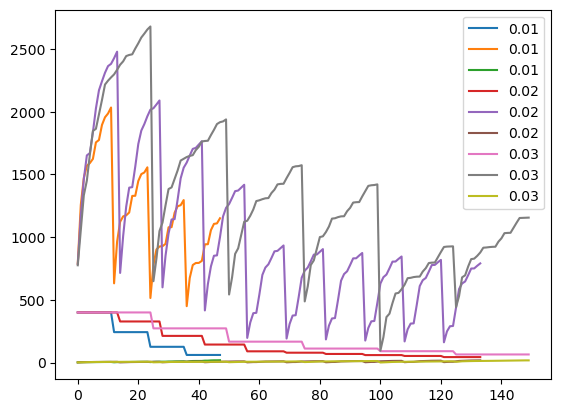

In [20]:
stp = 0.01


while stp <= 0.03:
	file = "results/performance/res-leach/net1/P-" + str(stp) + "/0-performance.npy"
	bdt = np.load(file, allow_pickle=True).item()
	plt.plot(bdt['throughput'], label = str(stp))
	stp += 0.01
plt.legend()
plt.show()